In [7]:
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image


In [90]:
#Stating theme
import jupyterthemes as jt
!jt -t solarizedd -T -N -kl -nfs 11 -fs 11 -ofs 11 -cursc r -cellw 90%
jt.jtplot.style()
jt.get_themes()

['chesterish',
 'grade3',
 'gruvboxd',
 'gruvboxl',
 'monokai',
 'oceans16',
 'onedork',
 'solarizedd',
 'solarizedl']

In [6]:
ls TheRealDay2lab04ForRealThisIsTheOneWeWant\KKkalibration_horizontal

 Volume in drive C has no label.
 Volume Serial Number is F64F-FF16

 Directory of C:\Users\jarde\Documents\GitHub\AdvancedLab-PHSX444\lab04\TheRealDay2lab04ForRealThisIsTheOneWeWant\KKkalibration_horizontal

11/24/2021  11:16 AM    <DIR>          .
11/24/2021  11:16 AM    <DIR>          ..
11/12/2021  09:40 AM           756,674 image_00000.png
11/12/2021  09:40 AM           756,718 image_00001.png
11/12/2021  09:40 AM           756,542 image_00002.png
11/12/2021  09:40 AM           756,703 image_00003.png
11/12/2021  09:40 AM           756,613 image_00004.png
11/12/2021  09:40 AM           756,731 image_00005.png
11/12/2021  09:40 AM           756,638 image_00006.png
11/12/2021  09:40 AM           756,766 image_00007.png
11/12/2021  09:40 AM           756,636 image_00008.png
11/12/2021  09:40 AM           756,435 image_00009.png
11/12/2021  09:40 AM           107,449 Screenshot from 2021-11-12 09-40-12.png
              11 File(s)      7,673,905 bytes
               2 Dir(s)  147,623,

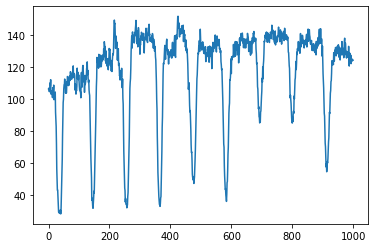

<ipython-input-46-06f629324051>:16: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/freq, np.abs(data))


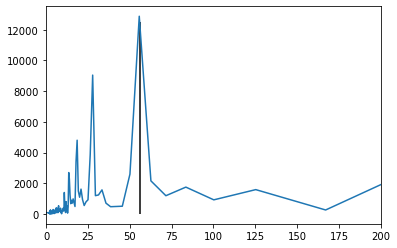

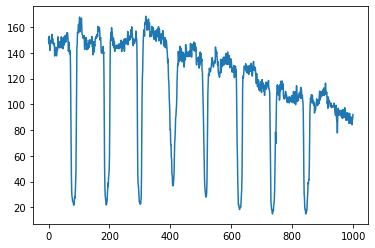

<ipython-input-46-06f629324051>:37: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/freq, np.abs(data))


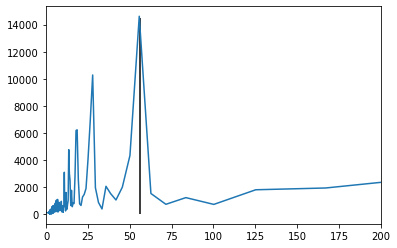

In [46]:
path = 'TheRealDay2lab04ForRealThisIsTheOneWeWant/KKkalibration_horizontal/'
names = ['image_00000.png', 'image_00001.png', 'image_00002.png', 'image_00003.png', 'image_00004.png', 
         'image_00005.png', 'image_00006.png', 'image_00007.png', 'image_00008.png', 'image_00009.png']
im = Image.open(path + names[0])
running_im = np.zeros([np.array(im).shape[0]])
for i in names:
    im = Image.open(path + i)
    running_im += np.array(im)[:, 500]
running_im = running_im/len(names)
plt.plot(running_im)
plt.show()

t = np.arange(501)
freq = np.fft.fftfreq(t.shape[-1])
data = np.fft.rfft(running_im)
plt.plot(1/freq, np.abs(data))
plt.xlim(0,200)
plt.vlines(56, 0, 12500, color='black')
plt.show()

# h calibration: 56

path = 'TheRealDay2lab04ForRealThisIsTheOneWeWant/KKkalibration_vertical/'
names = ['image_00000.png', 'image_00001.png', 'image_00002.png', 'image_00003.png', 'image_00004.png', 
         'image_00005.png', 'image_00006.png', 'image_00007.png', 'image_00008.png', 'image_00009.png']
im = Image.open(path + names[0])
running_im = np.zeros([np.array(im).shape[0]])
for i in names:
    im = Image.open(path + i)
    running_im += np.array(im)[500, :]
running_im = running_im/len(names)
plt.plot(running_im)
plt.show()

t = np.arange(501)
freq = np.fft.fftfreq(t.shape[-1])
data = np.fft.rfft(running_im)
plt.plot(1/freq, np.abs(data))
plt.xlim(0,200)
plt.vlines(56, 0, 14500, color='black')
plt.show()

# v calibration: 56


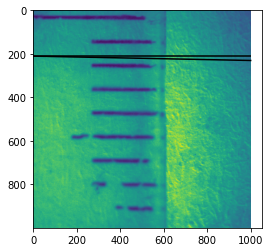

In [57]:
path = 'TheRealDay2lab04ForRealThisIsTheOneWeWant/KKkalibration_horizontal/'

im = Image.open(path + names[0])
plt.imshow(im)
plt.hlines(210, 0, 1000, color='black')
x = np.linspace(0,2000,1000)
m=0.01
plt.plot(m*x + 210, color='black')
plt.show()

#small enough angle to call it small angle approx

In [64]:

yscale = (56)
xscale = (56)
xpix = u.def_unit('xpix', 10*u.um/xscale)
ypix = u.def_unit('ypix', 10*u.um/yscale)

## key for runs:
<ul>
    <li>31: 30Hz</li>
    <li>32: 120Hz</li>
    <li>33: 60Hz</li>
    <li>34: 60.5Hz</li>
    <li>35: 59.5Hz</li>
    <li>36: 200Hz</li>
</ul>

In [261]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is F64F-FF16

 Directory of C:\Users\jarde\Documents\GitHub\AdvancedLab-PHSX444\lab04

11/24/2021  08:30 PM    <DIR>          .
11/24/2021  08:30 PM    <DIR>          ..
11/24/2021  01:03 PM    <DIR>          .ipynb_checkpoints
11/24/2021  08:07 PM           320,984 analysis.ipynb
11/24/2021  08:30 PM             5,871 cross-correlate_simple.py
11/24/2021  08:21 PM    <DIR>          group02_data
11/11/2021  10:05 PM    <DIR>          lab_4_Paul_trapping
11/24/2021  12:24 PM    <DIR>          processed_data
11/11/2021  10:05 PM             1,583 Table of Contents.html
11/24/2021  11:16 AM    <DIR>          TheRealDay2lab04ForRealThisIsTheOneWeWant
               3 File(s)        328,438 bytes
               7 Dir(s)  110,509,195,264 bytes free


In [262]:
data = pd.read_csv("group02_data/processed_data/data_04.csv")
data.rename(columns={'# x': 'x'}, inplace=True)

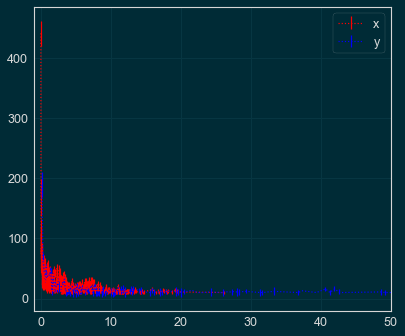

In [269]:
hisx = np.histogram((data["x"]-np.mean(data["x"]))**2, bins=5000)
df = pd.DataFrame({'bin_right': hisx[1][1:], 'count':hisx[0], 'err':np.sqrt(hisx[0])})
df = df[df['count'] >= 10]
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle=":", marker="x", color="red", label = 'x')

hisy = np.histogram((data["y"]-np.mean(data["y"]))**2, bins=5000)
df = pd.DataFrame({'bin_right': hisy[1][1:], 'count':hisy[0], 'err':np.sqrt(hisx[0])})
df = df[df['count'] >= 10]
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle=":", marker="x", color="blue", label='y')
plt.legend()
plt.xlim(-1, 50)
plt.show()

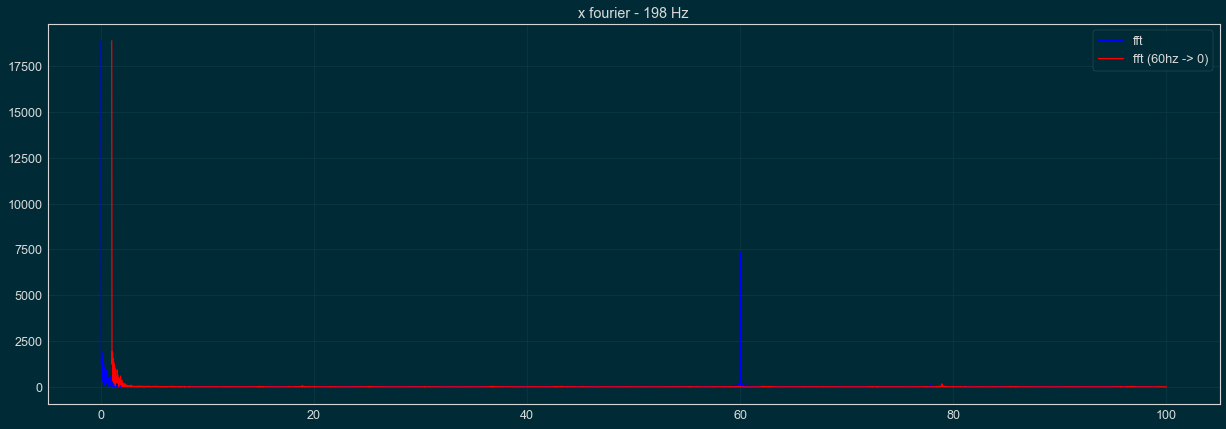

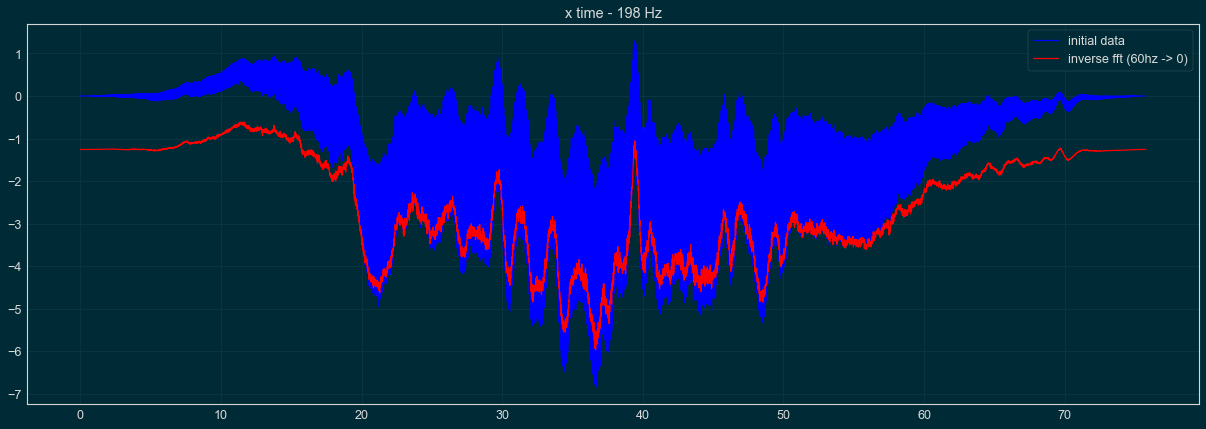

In [311]:
plt.figure(figsize=(21,7))
datax = data['x']*np.hanning(len(data['x']))
datax_four = np.fft.rfft(datax)
freq = np.fft.rfftfreq(len(datax), 1/198)
dffreq = pd.DataFrame({'freq':freq, 'data': datax_four})
plt.plot(dffreq['freq'], np.abs(dffreq['data']), color='blue', label='fft')
dffreq.loc[(dffreq['freq']>59) & (dffreq['freq']<61), 'data']=0
plt.plot(dffreq['freq']+1, np.abs(dffreq['data']), color='red', label='fft (60hz -> 0)')
plt.title('x fourier - 198 Hz')
plt.legend()
plt.show()

plt.figure(figsize=(21,7))
t = np.linspace(0,len(data['x'])*1/198, len(data['x']))
plt.plot(t, data['x']*np.hanning(len(data['x'])), label='initial data',color = 'blue')
inverse_data = np.fft.ifft(dffreq['data'])
t = np.linspace(0,len(inverse_data)*2/198, len(inverse_data))
plt.title('x time - 198 Hz')
plt.plot(t, np.fft.ifft(dffreq['data']).real, label='inverse fft (60hz -> 0)', color='red')
plt.legend()
plt.show()

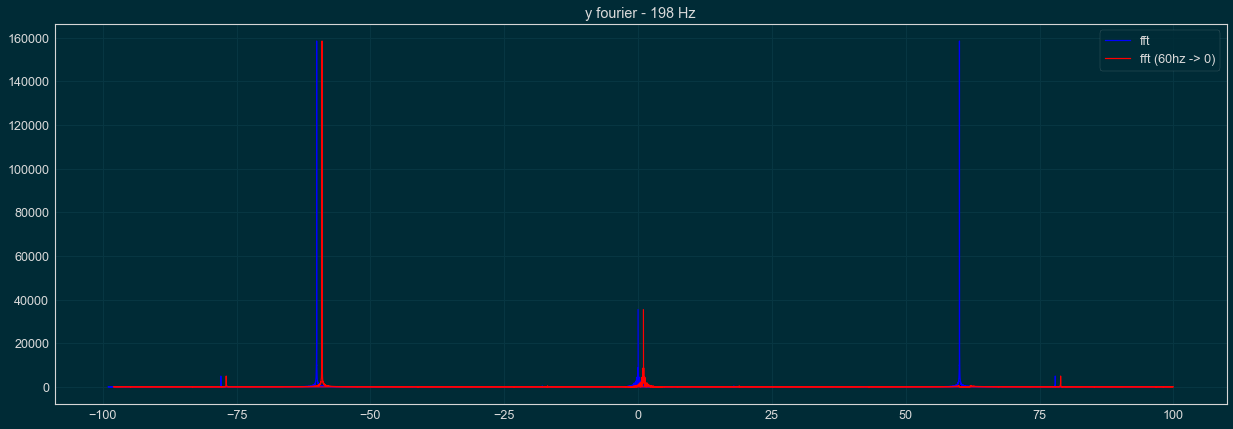

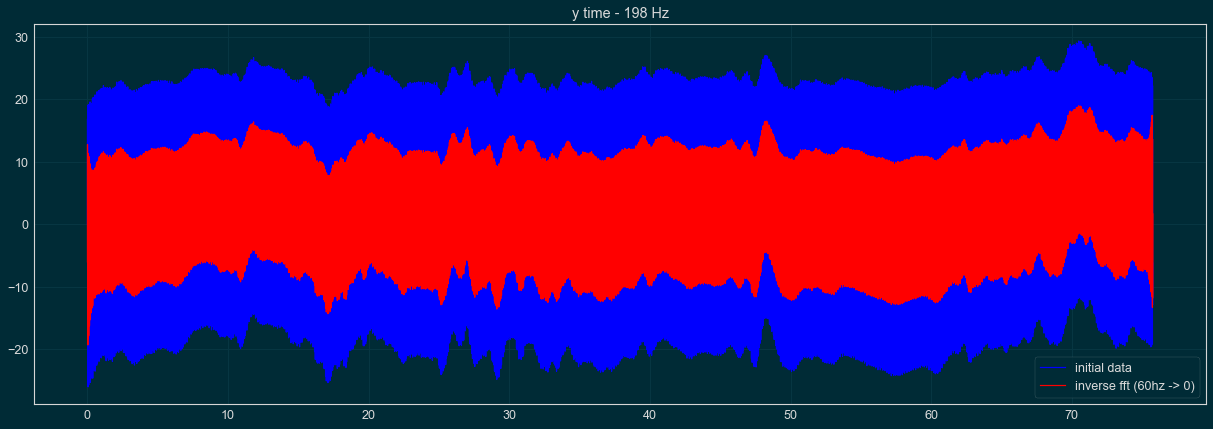

In [337]:
plt.figure(figsize=(21,7))
# datay = data['y']*np.hanning(len(data['y']))
datay = data['y']
datay_four = np.fft.fft(datay)
freq = np.fft.fftfreq(len(datay), 1/198)
dffreq = pd.DataFrame({'freq':freq, 'data': datay_four})
plt.plot(dffreq['freq'], np.abs(dffreq['data']), color='blue', label='fft')
dffreq.loc[(dffreq['freq']>59) & (dffreq['freq']<61), 'data']=0
plt.plot(dffreq['freq']+1, np.abs(dffreq['data']), color='red', label='fft (60hz -> 0)')
plt.title('y fourier - 198 Hz')
plt.legend()
plt.show()

plt.figure(figsize=(21,7))
t = np.linspace(0,len(data['y'])*1/198, len(data['y']))
# plt.plot(t, data['y']*np.hanning(len(data['y'])), label='initial data',color = 'blue')
plt.plot(t, data['y'], label='initial data',color = 'blue')
inverse_data = np.fft.ifft(dffreq['data']).real
t = np.linspace(0,len(inverse_data)*1/198, len(inverse_data))
plt.title('y time - 198 Hz')
plt.plot(t, inverse_data, label='inverse fft (60hz -> 0)', color='red')
plt.legend()
plt.show()

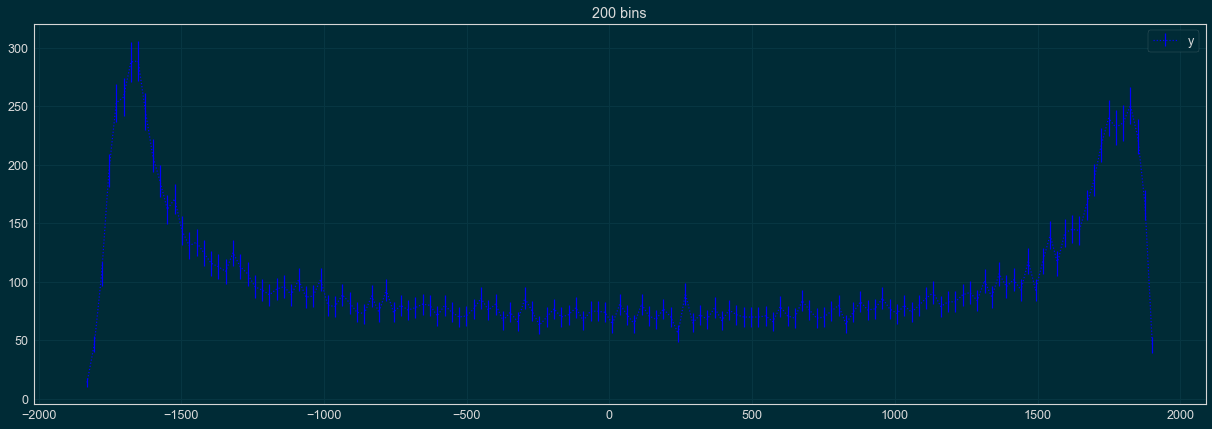

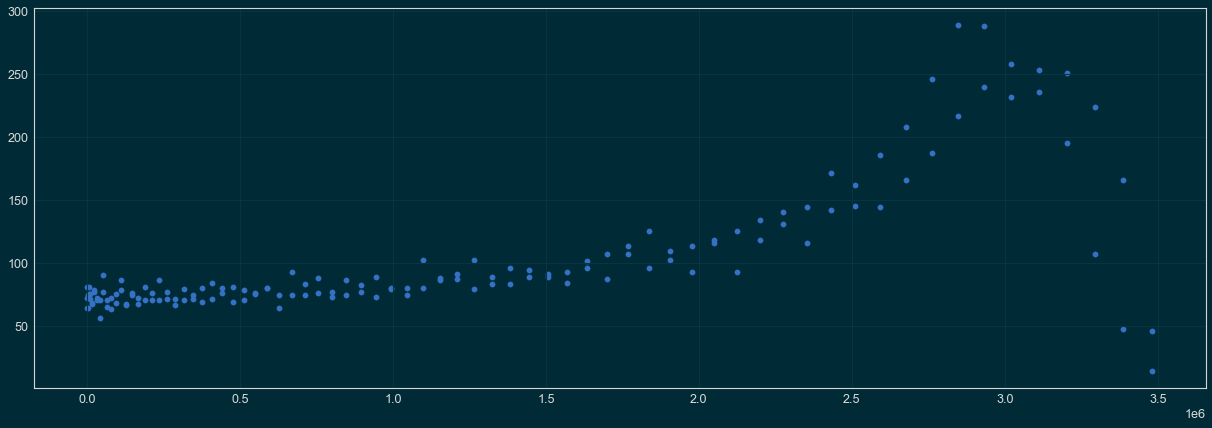

In [349]:
vel = (inverse_data[1:] - inverse_data[:-1])/(2/198)
t = np.linspace(0,len(vel)*2/198, len(vel))

his_vely = np.histogram(vel, bins=200)
df = pd.DataFrame({'bin_right': his_vely[1][1:], 'count':his_vely[0], 'err':np.sqrt(his_vely[0])})
df = df[df['count'] >= 10]
plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle=":", marker="x", color="blue", label='y')
plt.legend()
plt.title('200 bins')
plt.show()

plt.figure(figsize=(21,7))
df['bin_right_squr'] = (df['bin_right'] - np.mean(df['bin_right']))**2
plt.scatter(df['bin_right_squr'], df['count'])
plt.show()

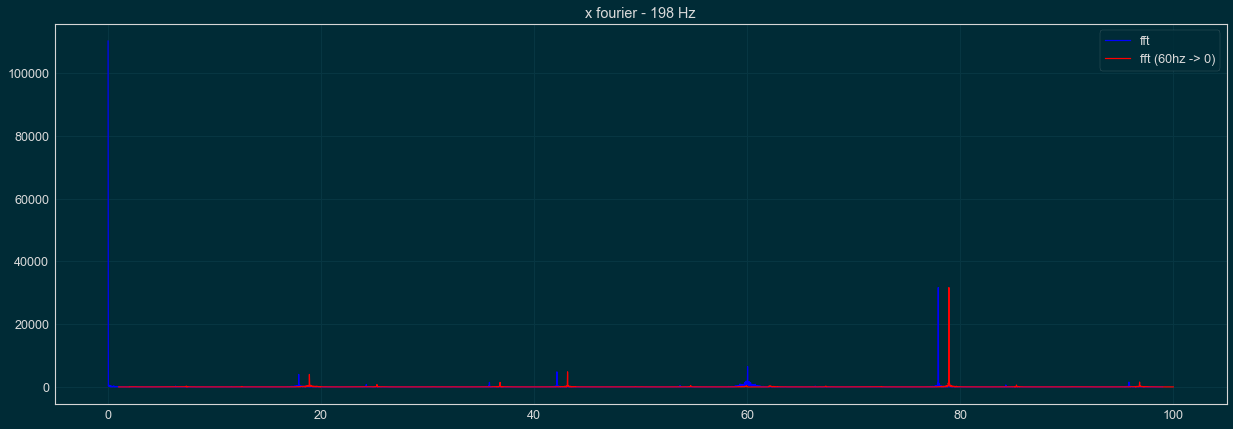

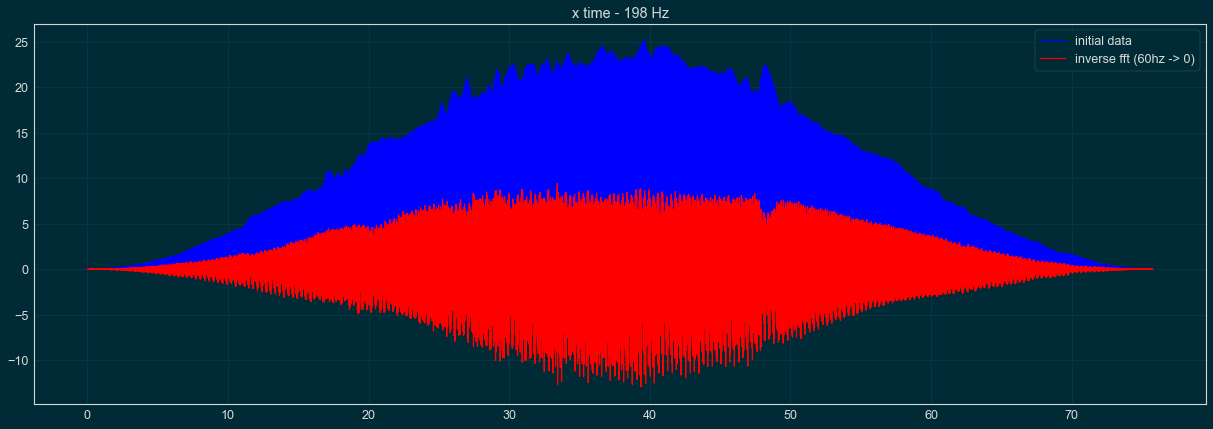

In [313]:
dat = np.sqrt(data['x']**2 + data['y']**2)*np.hanning(len(data['x']))

plt.figure(figsize=(21,7))
dat_four = np.fft.rfft(dat)
freq = np.fft.rfftfreq(len(dat), 1/198)
dffreq = pd.DataFrame({'freq':freq, 'data': dat_four})
plt.plot(dffreq['freq'], np.abs(dffreq['data']), color='blue', label='fft')
dffreq.loc[(dffreq['freq']>59) & (dffreq['freq']<61), 'data']=0
dffreq.loc[(dffreq['freq']<1), 'data']=0
plt.plot(dffreq['freq']+1, np.abs(dffreq['data']), color='red', label='fft (60hz -> 0)')
plt.title('x fourier - 198 Hz')
plt.legend()
plt.show()

plt.figure(figsize=(21,7))
t = np.linspace(0,len(dat)*1/198, len(dat))
plt.plot(t, dat, label='initial data',color = 'blue')
inverse_data = np.fft.ifft(dffreq['data'])
t = np.linspace(0,len(inverse_data)*2/198, len(inverse_data))
plt.title('x time - 198 Hz')
plt.plot(t, np.fft.ifft(dffreq['data']).real, label='inverse fft (60hz -> 0)', color='red')
plt.legend()
plt.show()

ValueError: max() arg is an empty sequence

Empty DataFrame
Columns: [freq, data]
Index: []